<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>



<div style="background-color: #E6E6FA; padding: 15px; border-radius: 12px;">


# 🚕❄️ PROYECTO DE ANALISIS DE DATOS DE VIAJES PARA LA EMPRESA ZUBER EN CHICAGO

## CONTEXTO INTRODUCTORIO

En los pasos anteriores del proyecto, analizamos los patrones de viaje en la ciudad de Chicago durante noviembre de 2017, explorando:

Datos meteorológicos de la ciudad para identificar condiciones climáticas

Información de viajes y compañías de taxi a través de consultas SQL, observando:

La cantidad de viajes por compañía

El comportamiento en días específicos

Comparaciones entre empresas como Yellow, Blue, Flash Cab, entre otras

La relación entre clima y duración de los trayectos, específicamente en los viajes desde el barrio Loop hasta el Aeropuerto Internacional O’Hare

🔍 En los Pasos 4 y 5, continuaremos con el análisis exploratorio usando Python, cargando los datos extraídos mediante SQL y complementándolos con visualizaciones informativas. Durante esta fase del proyecto:

📁 Trabajaremos con tres datasets:

**chicago1**: información sobre empresas de taxis y cantidad de viajes

**chicago2**: viajes por barrio de destino

**chicago3**: duración de trayectos por fechas con condiciones climáticas, exclusivamente desde el barrio Loop hasta el aeropuerto O’Hare

Sobre estos dataframes:

Importaremos y revisaremos los datos para asegurar que los tipos de datos sean correctos

Identificaremos los 10 barrios con más finalizaciones de viajes

Generaremos visualizaciones para:

Comparar el número de viajes por empresa de taxis

Analizar los barrios más visitados

Sacaremos conclusiones basadas en cada gráfico, explicando lo que muestran en relación con patrones, frecuencia y duración de los viajes

Además, nos enfocaremos en observar patrones clave como:

Influencia del clima y del día de la semana en la duración de los trayectos desde Loop hasta O'Hare

Diferencias entre barrios y compañías de transporte

🎯 Objetivo final: Identificar factores que afectan el comportamiento de los usuarios de Zuber, para proponer mejoras en su modelo de negocio.

Finalmente, en el Paso 5, también realizaremos pruebas de hipótesis estadísticas para evaluar si las diferencias observadas (por ejemplo, en la duración de los viajes bajo distintas condiciones climáticas) son significativas y no producto del azar.

Es importante tener en cuenta que estas pruebas se realizan exclusivamente sobre los viajes entre el barrio Loop y el Aeropuerto Internaci O’Hare, por lo que los resultados no deben generalizarse a toda la red de trayectos en la ciudad.

</div>

<div style="background-color: #E6E6FA; padding: 10px; font-weight: bold;">

## IMPORTAR LIBRERIAS Y DESCARGA DE ARCHIVOS ###

</div>

In [1]:
# Se importan las librerías que se ocuparán en el proyecto
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
# Se importan los archivos sql obtenidos de los pasos 2 y 3 de este proyecto
chicago1 = pd.read_csv("/datasets/project_sql_result_01.csv")
chicago2 = pd.read_csv("/datasets/project_sql_result_04.csv")
chicago3 = pd.read_csv("/datasets/project_sql_result_07.csv")


<div style="background-color: #e6e6f0; border-left: 4px solid #8a8faa; padding: 10px; margin-top: 10px; margin-bottom: 10px">    
ℹ️ **Nota**: Los archivos `project_sql_result_01.csv`(chicago1), `04.csv`(chicago2) y `07.csv`(chicago3) contienen los datos exportados de las consultas SQL realizadas en los pasos anteriores del proyecto. Estos archivos fueron generados automáticamente por la plataforma, y simulan el entorno de trabajo real en el que continuamos el análisis usando Python.
</div>

<div style="background-color: #d3d3d3; padding: 10px; font-size: 12px; font-weight: bold;">
    
#### CONFIGURACION DE FORMATO: LIMITAR FLOATS A 2 DECIMALES Y SEPARAR MILES

</div>

In [3]:
# Establecer el formato de visualización para floats (2 decimales y separación de miles)
pd.options.display.float_format = '{:,.2f}'.format


<div style="background-color: #E6E6FA; padding: 15px; border-radius: 12px;">
    
## PASO 4: ANALISIS EXPLORATORIO DE DATOS

</div>



<div style="background-color: #D8DAE6; padding: 15px; border-radius: 12px;">
    
### **4.1 PREPARACION DE DATOS POR DATAFRAME**

</div>

<div style="background-color: #EFEBD6; padding: 15px; border-radius: 12px;">
    
#### **DATAFRAME CHICAGO1: INFORMACION SOBRE EMPRESAS DE TAXIS Y CANTIDAD DE VIAJES**

</div>

In [4]:

# Contenido informativo del Dataframe
chicago1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:

# Visualización de la información del Dataframe
chicago1.head()


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [6]:
# Identificar si exiten valores duplicados
duplicados1 = chicago1.duplicated().sum()
print(f"La cantidad de valores duplicados del dataframe chicago1 es de {duplicados1}")

La cantidad de valores duplicados del dataframe chicago1 es de 0


In [7]:

# Datos estadísticos perliminares
chicago1.describe()


,trips_amount
count,64.00
mean,"2,145.48"
std,"3,812.31"
min,2.00
25%,20.75
50%,178.50
75%,"2,106.50"
max,"19,558.00"


<div style="background-color: #f0f0f0; padding: 15px; border-radius: 12px;">


#### **DATAFRAME CHICAGO1: CONCLUSIONES DE LA REVISION PRELIMINAR DE DATOS** 

El dataframe chicago1 contiene 64 registros con información sobre empresas de taxis y la cantidad de viajes realizados. No presenta valores nulos ni duplicados, y sus columnas tienen tipos de datos correctos. Se observa una gran disparidad en la cantidad de viajes entre empresas: pocas concentran la mayoría de los viajes, como Flash Cab con 19,558, mientras que muchas otras tienen cifras significativamente menores. La media es alta (2,145), pero la mediana baja (178), lo que confirma una distribución sesgada hacia unos pocos valores elevados.


</div>

<div style="background-color: #EFEBD6; padding: 15px; border-radius: 12px;">
    
#### **DATAFRAME CHICAGO2: VIAJES POR BARRIO DE DESTINO**

</div>

In [8]:
# Contenido informativo del Dataframe 
chicago2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:

# Visualización de la información del Dataframe
chicago2.head()


,dropoff_location_name,average_trips
0,Loop,"10,727.47"
1,River North,"9,523.67"
2,Streeterville,"6,664.67"
3,West Loop,"5,163.67"
4,O'Hare,"2,546.90"


In [10]:
# Identificar si exiten valores duplicados
duplicados2 = chicago1.duplicated().sum()
print(f"La cantidad de valores duplicados del dataframe chicago1 es de {duplicados2}")

La cantidad de valores duplicados del dataframe chicago1 es de 0


In [11]:
# Datos estadísticos perliminares
chicago2.describe()


,average_trips
count,94.00
mean,599.95
std,"1,714.59"
min,1.80
25%,14.27
50%,52.02
75%,298.86
max,"10,727.47"


<div style="background-color: #f0f0f0; padding: 15px; border-radius: 12px;">

#### **DATAFRAME CHICAGO2: CONCLUSIONES DE LA REVISION PRELIMINAR DE DATOS** 

El dataframe chicago2 contiene 94 registros sobre barrios de destino y el número promedio de viajes. Los datos están completos, sin valores nulos, y con tipos correctos. Se observa una gran dispersión: algunos barrios como Loop tienen promedios muy altos (más de 10,000), mientras otros apenas superan los 10 viajes. La media es de 599, pero la mediana es apenas de 52, lo que indica una fuerte asimetría con unos pocos barrios que concentran la mayoría de los trayectos. No hay valores duplicados.

</div>

<div style="background-color: #EFEBD6; padding: 15px; border-radius: 12px;">
    
#### **DATAFRAME CHICAGO3: DURACION DE TRAYECTOS CON CONDICIONES CLIMATICAS**

</div>

In [12]:

# Contenido informativo del Dataframe 
chicago3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [13]:

# Visualización de la información del Dataframe
chicago3.head()


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,"2,410.00"
1,2017-11-25 14:00:00,Good,"1,920.00"
2,2017-11-25 12:00:00,Good,"1,543.00"
3,2017-11-04 10:00:00,Good,"2,512.00"
4,2017-11-11 07:00:00,Good,"1,440.00"


In [14]:

# Convertir la columna start_ts de tipo object a datetime
chicago3['start_ts'] = pd.to_datetime(chicago3['start_ts'])

# Convertir la columna duration_seconds de float64 a int64 (enteros)
chicago3['duration_seconds'] = chicago3['duration_seconds'].astype('int64')

# Verificar cambios
print(chicago3.dtypes)


start_ts              datetime64[ns]
weather_conditions            object
duration_seconds               int64
dtype: object


In [15]:
# Identificar si exiten valores duplicados
duplicados3 = chicago1.duplicated().sum()
print(f"La cantidad de valores duplicados del dataframe chicago1 es de {duplicados3}")

La cantidad de valores duplicados del dataframe chicago1 es de 0


In [16]:

# Datos estadísticos perliminares
chicago3.describe()



,duration_seconds
count,"1,068.00"
mean,"2,071.73"
std,769.46
min,0.00
25%,"1,438.25"
50%,"1,980.00"
75%,"2,580.00"
max,"7,440.00"


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de hacer la revisión inicial de los datos
</div>

<div style="background-color: #f0f0f0; padding: 15px; border-radius: 12px;">

#### **DATAFRAME CHICAGO3: CONCLUSIONES DE LA REVISION PRELIMINAR DE DATOS** 

El dataframe chicago3 contiene 1,068 registros sobre trayectos con fechas, condiciones climáticas y duración en segundos. Inicialmente, las columnas start_ts y duration_seconds tenían tipos de datos incorrectos (object y float64, respectivamente), pero se corrigieron: start_ts fue convertida a tipo datetime64 y duration_seconds a tipo int64, asegurando un análisis correcto de fechas y valores enteros. No se detectaron valores duplicados, ni valores ausentes. La duración de los trayectos muestra una amplia dispersión, con un mínimo de 0 segundos, un máximo de 7,440 segundos y una media de aproximadamente 2,072 segundos, lo que indica gran variabilidad en la duración de los viajes.

</div>

<div style="background-color: #F7E7CE; padding: 15px; border-radius: 12px;">



### **RESUMEN GENERAL DE LA REVISION PRELIMINAR DE DATOS**

Tras revisar los tres dataframes, se observa que los datos están mayormente completos y estructurados correctamente, sin valores duplicados ni ausentes.

El dataframe chicago1 contiene información sobre empresas de taxis y el número de viajes realizados entre el 15 y 16 de noviembre de 2017. No presenta datos faltantes ni duplicados. El análisis muestra una distribución muy desigual: unas pocas empresas concentran la mayoría de los viajes, lo cual genera una diferencia considerable entre la media y la mediana del total de viajes registrados.

El dataframe chicago2, enfocado en barrios de destino y número promedio de viajes, también mostró una fuerte asimetría: unos pocos barrios concentran la mayoría de los viajes, mientras que muchos tienen un volumen muy bajo. Este patrón sugiere una distribución desigual de la demanda de transporte en la ciudad.

En el dataframe chicago3, se incluyen datos sobre trayectos individuales, fechas, condiciones climáticas y duración del viaje, específicamente entre el barrio Loop y el Aeropuerto Internacional O'Hare. Se corrigieron tipos de datos de la columna "start_ts" a tipo de dato datetime, y la columna "duration_seconds" a tipo entero. Asimismo, se observa una amplia variabilidad en la duración de los trayectos, lo que puede estar influenciado por factores externos como el clima. Además, como todos los registros corresponden al día sábado, esto limita el análisis comparativo entre días.

Estos primeros hallazgos apuntan hacia ciertos patrones que conviene analizar más a fondo en la siguiente sección: ¿Cómo influyen las condiciones climáticas, los horarios o las zonas geográficas en la duración y frecuencia de los trayectos? La visualización de datos nos permitirá identificar correlaciones y tendencias clave para responder estas preguntas.


</div>

<div style="background-color: #D8DAE6; padding: 15px; border-radius: 12px;">
    
### **4.2 ANALISIS Y VISUALIZACION DE DATOS**

</div>


<div style="background-color: #EFEBD6; padding: 15px; border-radius: 12px;">

#### **GRAFICO 1: TOP 10 EMPRESAS DE TAXIS POR NUMERO DE VIAJES**

</div>


                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953



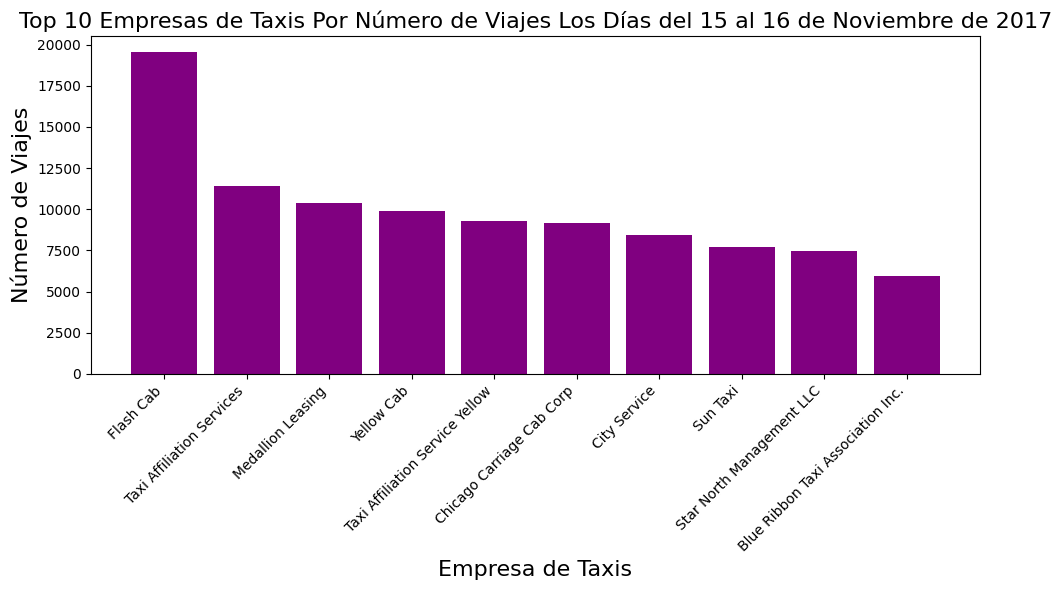

In [17]:

# Top 10 empresas de taxis por mayor número de viajes entre el 15 y 16 noviembre de 2017

# Ordenamos los datos por trips_amount y obtenemos las top 10
top_10_companies = chicago1.sort_values(by='trips_amount', ascending=False).head(10)
print(top_10_companies)

# Definir el tamaño de la figura para mejor visualización
plt.figure(figsize=(10, 6))

# Crear gráfico de barras con color azul
plt.bar(top_10_companies['company_name'], top_10_companies['trips_amount'], color='purple')

# Agregar título y etiquetas
plt.title('Top 10 Empresas de Taxis Por Número de Viajes Los Días del 15 al 16 de Noviembre de 2017', fontsize=16)
plt.xlabel('Empresa de Taxis', fontsize=16)
plt.ylabel('Número de Viajes', fontsize=16)

# Rotar etiquetas del eje X para evitar que se monten
plt.xticks(rotation=45, ha='right')

# Ajustar el layout para que no se corte nada
plt.tight_layout()

print()

# Mostrar gráfico
plt.show()



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de mostrar el resultado, se puede observar la compañía que tiene más viajes agendados gracias a que limitaste el número de elementos que se muestran
</div>


<div style="background-color: #f0f0f0; padding: 15px; border-radius: 12px;">

#### **COMENTARIOS GRAFICO 1: TOP 10 EMPRESAS DE TAXIS POR NUMERO DE VIAJES**

Este gráfico muestra las 10 principales empresas de taxis en Chicago, ordenadas por el número total de viajes realizados durante los días 15 y 16 de noviembre de 2017.

Se puede observar que:

Flash Cab es la empresa con mayor cantidad de viajes, con casi 20,000 viajes en estos dos días.

Le siguen Taxi Affiliation Services y Medallion Leasing con una diferencia significativa, pero mucho menor en comparación con Flash Cab.

Las demás empresas tienen un rango de viajes que varía aproximadamente entre 6,000 y 10,000 viajes.

La visualización facilita comparar rápidamente la popularidad y volumen de viajes de cada compañía durante este periodo específico.

</div>


<div style="background-color: #EFEBD6; padding: 15px; border-radius: 12px;">

#### **GRAFICO 2: DISTRIBUCIÓN DE VIAJES PROMEDIO POR BARRIO Y PRINCIPALES BARRIOS DE DESTINO**



In [18]:

# Identificar la distribución de viajes promedio de los 10 principales barrios en  
# términos de finalización del recorrido
top10_barrios = chicago2.sort_values("average_trips", ascending=False).head(10).reset_index(drop=True)
top10_barrios


,dropoff_location_name,average_trips
0,Loop,"10,727.47"
1,River North,"9,523.67"
2,Streeterville,"6,664.67"
3,West Loop,"5,163.67"
4,O'Hare,"2,546.90"
5,Lake View,"2,420.97"
6,Grant Park,"2,068.53"
7,Museum Campus,"1,510.00"
8,Gold Coast,"1,364.23"
9,Sheffield & DePaul,"1,259.77"


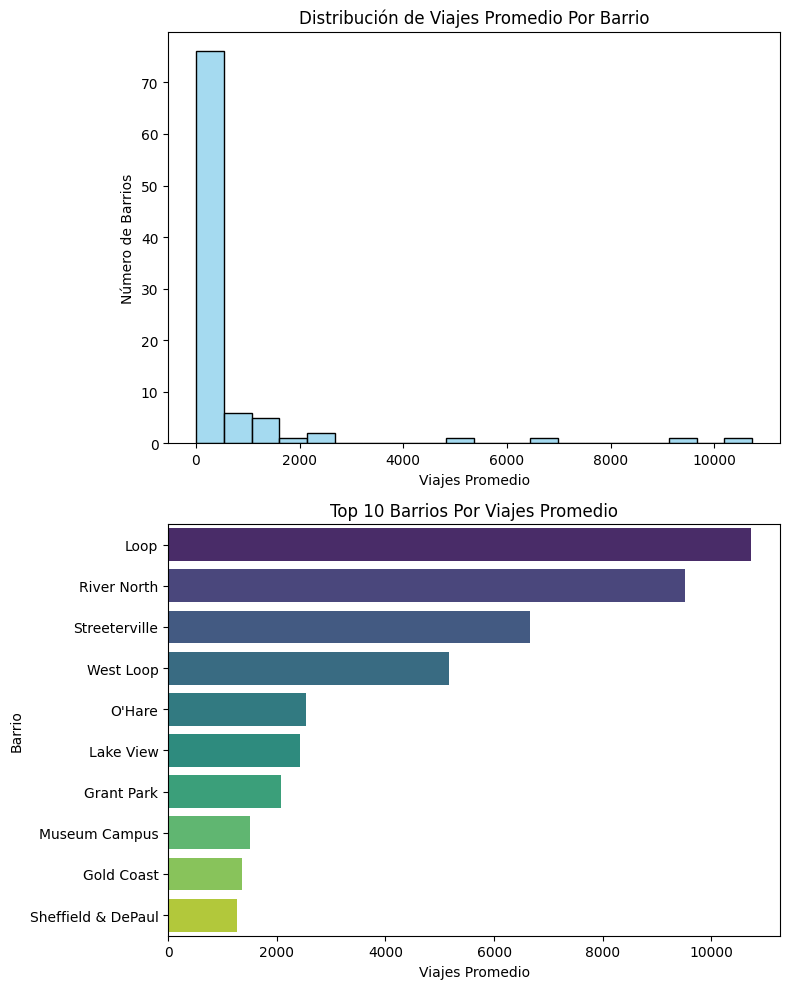

In [19]:
# Ordenar para obtener los 10 barrios con más viajes promedio
top10_barrios = chicago2.sort_values('average_trips', ascending=False).head(10)

# Crear figura con dos gráficos uno debajo del otro
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Histograma - distribución de viajes promedio para todos los barrios
sns.histplot(chicago2['average_trips'], bins=20, kde=False, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de Viajes Promedio Por Barrio')
axes[0].set_xlabel('Viajes Promedio')
axes[0].set_ylabel('Número de Barrios')

# Barplot - top 10 barrios con más viajes promedio
sns.barplot(data=top10_barrios, x='average_trips', y='dropoff_location_name', palette='viridis', ax=axes[1])
axes[1].set_title('Top 10 Barrios Por Viajes Promedio')
axes[1].set_xlabel('Viajes Promedio')
axes[1].set_ylabel('Barrio')

plt.tight_layout()
plt.show()



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de crear una grafica que nos muestra los lugares más frecuentados
</div>

<div style="background-color: #f0f0f0; padding: 15px; border-radius: 12px;">

#### **COMENTARIOS GRAFICO 2: DISTRIBUCIÓN DE VIAJES PROMEDIO POR BARRIO Y PRINCIPALES BARRIOS DE DESTINO**

**Descripción de los gráficos:**

El primer gráfico muestra un histograma que representa la distribución de los viajes promedio en todos los barrios de la ciudad de Chicago. El eje horizontal indica el número promedio de viajes y el eje vertical muestra la cantidad de barrios con ese rango de viajes promedio.

El segundo gráfico es un diagrama de barras horizontales que presenta los 10 principales barrios con el mayor número de viajes promedio, destacando los barrios que concentran la mayor parte de los trayectos.

**Observaciones:**

La distribución del histograma revela que la mayoría de los barrios tienen un bajo número promedio de viajes, concentrándose en rangos por debajo de los 1000 viajes promedio.

Solo unos pocos barrios presentan valores altos de viajes promedio, como se observa en las barras del extremo derecho del histograma.

En el gráfico de barras, Loop es el barrio con el mayor promedio de viajes, superando los 10,700 viajes, seguido de River North con casi 9,500 viajes y Streeterville con más de ,000 viajes promedio.

Se evidencia una concentración importante de viajes en pocos barrios, mientras que la mayoría de los barrios tienen niveles mucho menores.

Esta distribución sugiere una fuerte centralización de la movilidad urbana en ciertas zonas clave, que podrían coincidir con áreas de actividad comercial, turística o centros de transporte.

✅**Conclusión:**

Los datos demuestran una desigualdad marcada en la distribución de los viajes promedio entre barrios en Chicago. La movilidad está concentrada en un pequeño número de barrios, especialmente Loop y River North, mientras que la mayoría de los barrios experimentan una cantidad significativamente menor de viajes. Esta concentración puede reflejar patrones económicos y sociales, y es importante considerarla en la planificación urbana y de transporte para mejorar la cobertura y accesibilidad en barrios menos atendidos.

</div>


<div style="background-color: #EFEBD6; padding: 15px; border-radius: 12px;">

#### **GRAFICO 3: DURACION DEL TRAYECTO POR DIA DE LA SEMANA**

</div>


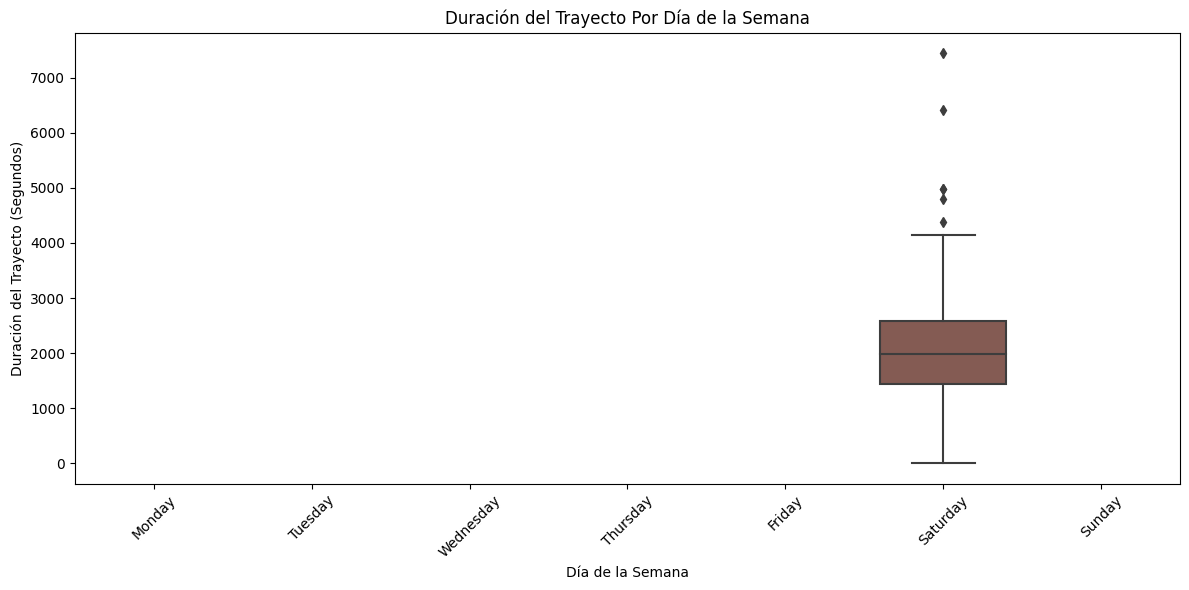

In [20]:
# Diagrama de caja correspondiente a la duración del trayecto por día de la semana

# Creamos columna con día de la semana
chicago3['day_of_week'] = chicago3['start_ts'].dt.day_name()

# Boxplot: duración por día de la semana
plt.figure(figsize=(12, 6))
sns.boxplot(data=chicago3, x='day_of_week', y='duration_seconds', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Duración del Trayecto Por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Duración del Trayecto (Segundos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="background-color: #f0f0f0; padding: 15px; border-radius: 12px;">

#### **COMENTARIOS GRAFICO 3: IMPACTO DE LA DURACION DEL TRAYECTO SEGUN EL DIA DE LA SEMANA**

El gráfico muestra la distribución de la duración de los trayectos por día de la semana. Se observa que todos los registros disponibles corresponden únicamente a los días sábado. Esto limita el análisis comparativo entre días, pero aun así permite observar la variabilidad de las duraciones en este día en particular, con valores atípicos que indican trayectos considerablemente más largos. Esta limitación también explica por qué no fue posible realizar un análisis de correlación significativo entre duración del trayecto y día de la semana según el clima. A pesar de ello, este gráfico ayuda a identificar el comportamiento de los trayectos en el único día disponible.

</div>


<div style="background-color: #EFEBD6; padding: 15px; border-radius: 12px;">

#### **GRAFICO 4: DURACION DE TRAYECTOS SEGUN CONDICIONES CLIMATICAS**

</div>


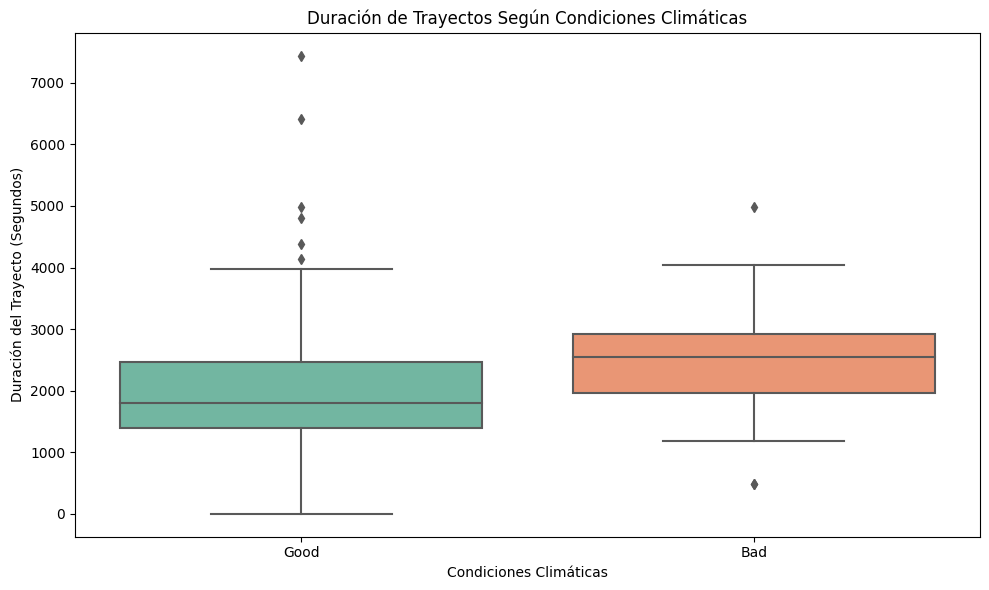

In [21]:

# Diagrama de caja de duración de trayectos por condiciones climáticas
plt.figure(figsize=(10,6))
sns.boxplot(data=chicago3, x='weather_conditions', y='duration_seconds', palette='Set2')
plt.title('Duración de Trayectos Según Condiciones Climáticas')
plt.xlabel('Condiciones Climáticas')
plt.ylabel('Duración del Trayecto (Segundos)')
plt.tight_layout()
plt.show()



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Buena manera de mostrar la distribución de ambos tipos de día, podemos ver una clara diferencia entre ellos
</div>

<div style="background-color: #f0f0f0; padding: 15px; border-radius: 12px;">


#### **COMENTARIOS GRAFICO 4: DURACION DE TRAYECTOS SEGUN CONDICIONES CLIMATICAS**

**Descripción del gráfico:**

Este gráfico de caja muestra la distribución de la duración de los trayectos (en segundos) bajo dos condiciones climáticas: “Good” (buen clima) y “Bad” (mal clima), específicamente para viajes desde el barrio Loop hacia el Aeropuerto O’Hare.

**Observaciones:**

La mediana de la duración es mayor en condiciones climáticas malas, lo que indica que los trayectos tienden a durar más cuando el clima es desfavorable.

El rango intercuartílico (IQR) es mayor bajo condiciones de buen clima, lo que implica que existe más variabilidad en la duración de los trayectos cuando las condiciones son favorables.

Se observan más valores atípicos con buen clima, y estos alcanzan duraciones notablemente más altas (superiores a los 7,000 segundos), mientras que en mal clima el valor máximo de los outliers no supera los 5,000 segundos.

La dispersión general y la presencia de valores extremos bajo clima bueno podría estar relacionada con otros factores no climáticos, como incidentes de tráfico puntuales o rutas alternativas.

✅**Conclusión:**

El gráfico indica que, si bien los trayectos tienden a ser más largos bajo condiciones de clima adversas en términos de mediana, la mayor dispersión y los valores extremos más altos se presentan bajo buen clima. Esto sugiere que el mal clima influye de forma consistente en alargar los trayectos, pero no necesariamente genera las mayores demoras absolutas, que en este caso se dieron bajo clima favorable. Es posible que haya otros factores no climáticos que estén afectando la duración de los trayectos incluso en días sin mal tiempo.

</div>



<div style="background-color: #F7E7CE; padding: 15px; border-radius: 12px;">

### **CONCLUSION GENERAL – ANALISIS Y VISUALIZACION DE DATOS**

La exploración de los datos mediante gráficos permitió obtener una visión clara sobre los patrones de movilidad en la ciudad de Chicago, enfocándonos en barrios de destino, empresas de taxis y condiciones climáticas. A continuación, se resumen los principales hallazgos:

**1. Barrios con mayor número de finalizaciones de viajes**

El análisis evidenció que la movilidad está altamente concentrada en pocos barrios clave. Los gráficos mostraron que zonas como Loop, River North y Streeterville concentran el mayor volumen de viajes promedio, con Loop superando los 10,700 viajes en promedio. En cambio, la mayoría de los barrios tienen volúmenes muy inferiores, reflejando una fuerte centralización del transporte urbano en áreas vinculadas a actividades comerciales, laborales o turísticas.

**2. Empresas de taxi con mayor actividad**

El análisis de los días 15 y 16 de noviembre de 2017 confirma que Flash Cab lidera con un volumen muy superior (casi 20,000 viajes), seguido por empresas como Taxi Affiliation Services y Medallion Leasin, que compiten en un rango más parejo entre sí. Este dominio de Flash Cab podría estar relacionado con factores como una flota más amplia, mayor cobertura o preferencia del usuario.

**3. Impacto del clima en la duración de los trayectos (trayecto Loop → O’Hare)**

El análisis centrado en la ruta Loop → O’Hare muestra que los trayectos tienen una mayor mediana de duración bajo clima adverso, lo que indica que las malas condiciones (como la lluvia) tienden a alargar los tiempos de viaje. Sin embargo, se observó que los trayectos bajo buen clima presentan mayor dispersión (IQR más amplio) y más valores atípicos, con duraciones que llegan incluso a superar los 7,000 segundos. Esto sugiere que, aunque el mal clima afecta de forma más consistente, las mayores demoras absolutas pueden presentarse incluso en condiciones favorables, posiblemente por otros factores como tráfico inesperado o desvíos.

**4. Impacto del día de la semana en la duración del trayecto (trayecto Loop → O’Hare)**

Este análisis fue limitado a los registros del día sábado, lo que restringe las comparaciones entre días. Aun así, permitió observar diferencias entre sábados lluviosos y no lluviosos en cuanto a duración del trayecto, reforzando la idea de que las condiciones climáticas pueden afectar significativamente la movilidad, incluso dentro de un mismo día de la semana.

✅ **Conclusión**

El análisis visual revela que la operación del servicio de taxis en Chicago está influida por diversos factores:

1. Ubicación geográfica, con alta concentración de viajes en ciertos barrios como Loop y River North.

2. Estructura empresarial, donde Flash Cab domina ampliamente el mercado en los días analizados, y otras empresas como Zuber tienen escasa o nula representación.

3. Condiciones climáticas, que afectan la duración de los trayectos, aunque los efectos no son siempre lineales: el mal clima incrementa la duración de forma más predecible, pero las mayores demoras extremas se han registrado en condiciones de buen clima.

Estos hallazgos son fundamentales para orientar la planificación del transporte, la asignación eficiente de recursos y la mejora del servicio para reducir tanto los tiempos de espera como los de traslado.

**Nota:** Los análisis de duración de traslado se basan exclusivamente en datos del trayecto Loop → O’Hare durante un único día de la semana, por lo que no deben generalizarse a toda la red de taxis ni a otros períodos.

</div>



<div style="background-color: #E6E6FA; padding: 15px; border-radius: 12px;">
    
## PASO 5: PRUEBA DE HIPOTESIS

</div>



<div style="background-color: #EFEBD6; padding: 10px; font-size: 16px; font-weight: bold;">

**HIPOTESIS: LA DURACION PROMEDIO DE LOS VIAJES DESDE EL BARRIO LOOP HASTA EL AEROPUERTO INTERNACIONAL O'HARE**
**CAMBIA EN SABADOS LLUVIOSOS**

</div>

<div style="background-color: #D8DAE6; padding: 15px; border-radius: 12px;">

#### **PLANTEAMIENTO DE HIPOTESIS PARA EL ANALISIS DE DURACION DE VIAJES ENTRE EL BARRIO LOOP Y EL AEROPUERTO O'HARE EN SABADOS LLUVIOSOS**

**Hipótesis Nula (H0):**

La duración promedio de los viajes desde el barrio Loop hasta el Aeropuerto Internacional O’Hare no cambia en sábados con condiciones climáticas adversas (lluvia, nieve, niebla) en comparación con sábados de buen clima.

**Hipótesis Alternativa (H1):**

La duración promedio de los viajes desde el barrio Loop hasta el Aeropuerto Internacional O’Hare varía en sábados con condiciones climáticas adversas en comparación con sábados de buen clima.

**Pruebas seleccionadas:**

Para evaluar las hipótesis se realizó primero una prueba de Levene para verificar la igualdad de varianzas entre los dos grupos de viajes (buen clima y mal clima). Según el resultado, se aplicó la prueba t de Student para muestras independientes, con un **nivel de significancia alpha de 0.05**. Además, dado que no se parte de un supuesto específico sobre si los trayectos en clima adverso son más largos o más cortos, se utilizó una **prueba estadística bilateral (de dos colas)**, con el objetivo de detectar cualquier diferencia significativa en la duración promedio entre ambos grupos. 

</div>


<div style="background-color: #EFEBD6; padding: 15px; border-radius: 12px;">

#### **PRUEBA DE LEVENE PARA IGUALDAD DE VARIANZAS**

</div>


In [22]:

# Prueba de Hipótesis: prueba de levene

# Filtrar los datos según la condición climática
buen_clima = chicago3[chicago3['weather_conditions'] == 'Good']['duration_seconds']
mal_clima = chicago3[chicago3['weather_conditions'] == 'Bad']['duration_seconds']

# Nivel de significancia
alpha = 0.05

# Prueba de Levene para verificar igualdad de varianzas
stat_levene, p_levene = st.levene(buen_clima, mal_clima)

print(f"Estadístico de Levene: {stat_levene:.4f}")
print(f"P-valor de Levene: {p_levene:.4f}")

# Evaluar resultado
if p_levene > alpha:
    print("No se rechaza H0: Las varianzas son iguales. Se puede usar la prueba t con varianzas iguales.")
else:
    print("Se rechaza H0: Las varianzas no son iguales. Usar la prueba t sin asumir varianzas iguales.")



Estadístico de Levene: 0.3885
P-valor de Levene: 0.5332
No se rechaza H0: Las varianzas son iguales. Se puede usar la prueba t con varianzas iguales.


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Bien hecho!<b/>

La manera de separar la información de ambos días así como la prueba de levene son correctas
</div>

<div style="background-color: #EFEBD6; padding: 15px; border-radius: 12px;">

#### **PRUEBA t DE STUDENT PARA DOS MUESTRAS INDEPENDIENTES**

</div>

In [23]:

# Prueba de Hipótesis: Prueba t de student

# Nivel de significancia
alpha = 0.05

# Prueba t de Student para dos muestras independientes (dos colas)
stat_ttest, p_ttest = st.ttest_ind(buen_clima, mal_clima, equal_var=True)

# Mostrar resultados
print(f"Estadístico t: {stat_ttest:.4f}")
print(f"P-valor: {p_ttest:.4f}")

# Evaluar hipótesis
if p_ttest > alpha:
    print("No se rechaza H0: No hay diferencia significativa en la duración promedio de los viajes.")
else:
    print("Se rechaza H0: Hay una diferencia significativa en la duración promedio de los viajes.")



Estadístico t: -6.9462
P-valor: 0.0000
Se rechaza H0: Hay una diferencia significativa en la duración promedio de los viajes.


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Bien hecho!<br/>

Es correcto rechazar la hipotesis nula, debido a que sí hay notables cambios entre un día de buenas condiciones y uno con malas condiciones
</div>

<div style="background-color: #F7E7CE; padding: 15px; border-radius: 12px;">

### **CONCLUSION DE LA PRUEBA DE  HIPOTESIS**

Para evaluar si la duración promedio de los viajes en taxi desde el barrio Loop hasta el Aeropuerto Internacional O’Hare cambia los sábados lluviosos, se llevaron a cabo dos pruebas estadísticas:

1. Prueba de Levene: Igualdad de varianzas

Estadístico de Levene: 0.3885


P-valor de Levene: 0.5332


Nivel de significancia (α): 0.05

Interpretación:
Como el p-valor es mayor que 0.05, no se rechaza la hipótesis nula de igualdad de varianzas.
Esto significa que las varianzas de duración en días con buen y mal clima pueden considerarse iguales, por lo que se justifica el uso de la prueba t de Student para varianzas iguales.

2. Prueba t de Student: Comparación de medias

Estadístico t: -6.9462

P-valor: 0.0000

Nivel de significancia (α): 0.05

Interpretación:
El p-valor es considerablemente menor que 0.05, por lo que se rechaza la hipótesis nula.
Esto indica que existe una diferencia estadísticamente significativa en la duración promedio de los viajes entre sábados con buen clima y sábados lluviosos.

✅ **Conclusión final del análisis**

Con base en ambas pruebas:

Las varianzas son iguales, lo cual valida el uso de la prueba t estándar.

Existe una diferencia significativa en la duración de los trayectos en función del clima los sábados.

Por lo tanto, se concluye que:

El clima lluvioso influye significativamente en la duración promedio de los viajes desde el barrio Loop hasta el Aeropuerto Internacional O’Hare.
Esta diferencia no se debe al azar y debe considerarse un patrón consistente respaldado estadísticamente.

Este hallazgo es especialmente relevante para la empresa Zuber, ya que puede usar esta información para anticipar retrasos, ajustar tiempos estimados de viaje, o incluso ajustar la oferta de vehículos según condiciones meteorológicas, mejorando así la satisfacción del cliente y la eficiencia operativa.

</div>

<div style="background-color: #E6E6FA; padding: 15px; border-radius: 12px;">
    
## CONCLUSION GENERAL DEL PROYECTO

</div>

<div style="background-color: #F7E7CE; padding: 15px; border-radius: 12px;">

Durante este proyecto analizamos una muestra representativa de datos de viajes en taxi en la ciudad de Chicago durante noviembre de 2017, con el objetivo de comprender la movilidad urbana frente a distintos factores externos y evaluar oportunidades para la nueva empresa Zuber, que está introduciéndose en el mercado.

Aplicamos técnicas de análisis exploratorio, visualización y pruebas estadísticas para identificar patrones clave y construir una base informada sobre cómo Zuber podría posicionarse efectivamente en el mercado, basándose en evidencia empírica.

**Principales hallazgos:**

**1. Concentración de actividad en zonas específicas**

El análisis evidenció una alta concentración de viajes promedio en algunos barrios clave, especialmente Loop, River North y Streeterville, destacando Loop con más de 10,700 viajes promedio. Esto revela áreas de alta demanda estratégica para las primeras operaciones de Zuber.

**2. Liderazgo de empresas establecidas**

En los días analizados (15 y 16 de noviembre), Flash Cab se posiciona como líder absoluto en número de viajes, superando ampliamente a otras empresas como Taxi Affiliation Services, mientras que Zuber no aparece todavía entre las empresas más activas. Esto refleja el estado incipiente de Zuber y resalta la necesidad de una estrategia inicial que se enfoque en ganar visibilidad y presencia, especialmente en áreas de alta demanda.

**3. Impacto del clima en la duración de trayectos**

Se observó que trayectos bajo clima adverso tienen mayor duración mediana. Sin embargo, en días con buen clima se observó una mayor dispersión y una concentración más alta de valores atípicos, incluyendo duraciones extremas superiores a 7,000 segundos. Esto indica que las demoras pueden estar influenciadas por diversos factores, y no exclusivamente por el clima.

**4. Influencia del clima en viajes específicos (Loop → O’Hare)**

Se realizó un análisis específico sobre los viajes entre Loop y el Aeropuerto Internacional O’Hare, aplicando pruebas estadísticas:

1. La prueba de Levene indicó igualdad de varianzas entre días con buen y mal clima (p-valor > 0.05).

2. La prueba t de Student reveló una diferencia estadísticamente significativa entre las medias (p-valor ≈ 0.0000).

Este resultado respalda la conclusión de que los sábados lluviosos incrementan significativamente la duración de los trayectos en esta ruta, estableciendo un patrón consistente que debe ser tomado en cuenta por las empresas de transporte.

💡 **Recomendaciones para Zuber en su etapa inicial**

1. Inicio focalizado en barrios de alta demanda como Loop y River North, para maximizar visibilidad y oportunidades de servicio.

2. Provisión adaptable de flota en días lluviosos, anticipando demoras y ajustando tiempos de llegada.

3. Incorporación de predicciones climáticas en uma app para mejorar los tiempos estimados de llegada y la experiencia del usuario.

✅ **Conclusión**

Aunque Zuber está iniciando operaciones, este análisis ofrece información estratégica clave como: identificar zonas de alta demanda, resaltar desafíos operativos vinculados al clima, así como definir áreas de oportunidad para posicionarse de manera efectiva en un mercado competitivo. Estos hallazgos le permitirían lanzar operaciones más informadas y tomar decisiones tácticas desde el primer día basadas en datos reales y tendencias observadas.

</div>

# Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un trabajo excelente, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, los procedimientos realizados son correctos, este es un ejercicio que nos ayuda a entender y comprobar las hipotesis con procesos estadisticos.<br/>    
<br/>    

Te felicito por el excelente trabajo, mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- La presentación del proyecto es lo que más destaca, es excelente
- Las observaciones intermedias, así como las conclusiones finales me parecen bastante detalladas
- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado
- Se revisaron detalles muy minuciosamente con bastante cuidado
    
</div>

